# a reusable technique for markdown attachemnts

markdown cells have a special `attachments` field in the notebook format that holds image data from drag and drop or copy paste. i think there is a nice reusable technique with `svg`s to extend the use of these images. 

reuse of datauris explicitly is not good for the file size
and this approach mitigates any duplications of attachments in the document.

typically the attachments are inserted directly as a `img` tags for ONE time use.
if we use `svg>image[id]` elements then we can invoke the `use` tag for reuse anywhere in the page.

In [114]:
%%
## load a notebook with attachments

    cells = (
        await Index(["../../../syllabus/docs/literacy.ipynb"]).apath().apath.read_text()
    ).apply(json.loads).itemgetter("cells").explode().series()

load a notebook with attachments 
 cells = (
 await Index(["../../../syllabus/docs/literacy.ipynb"]).apath().apath.read_text()
).apply(json.loads).itemgetter("cells").explode().series()

In [115]:
%%
    attachments = cells.attachments.dropna().series().stack().series()

{{len(attachments)}} `attachments` in the sample document

{{attachments._repr_html_()}}

attachments = cells.attachments.dropna().series().stack().series()
 
 2 attachments in the sample document 
 

 
 
 
 
 
 image/png 
 
 
 
 
 ../../../syllabus/docs/literacy.ipynb 
 404ac14c-68b5-4d8c-a6e6-7a6c73277d07.png 
 iVBORw0KGgoAAAANSUhEUgAABrIAAAIuCAYAAADzBJg6AA... 
 
 
 e9e27d2d-3796-483b-85db-6e02ab9a2c04.png 
 iVBORw0KGgoAAAANSUhEUgAABrIAAAIuCAYAAADzBJg6AA...

'<svg height=558 width=1714>\n    <image href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABrIAAAIuCAYAAADzBJg6AAAABHNCSVQICAgIfAhkiAAAABl0RVh0U29mdHdhcmUAZ25vbWUtc2NyZWVuc2hvdO8Dvz4AAAAtdEVYdENyZWF0aW9uIFRpbWUAU3VuIDAzIE5vdiAyMDI0IDA3OjI4OjQ5IFBNIFBTVIn6e10AACAASURBVHic7L1psG3bVd/3m93qdnea279W70mykABJgAQBATIgJCoBlxMIdogDOA0foEhXlVIZ7BDspFxJCCaVfI0rcVGVCuBU5UNwwIACBgMB1D1Qw5P03n23v6fdzepmlw9zrb3PuXpgCpIqhDVfvXv22WfttWYzxphj/v9jjC1Of+iboi4ybAy4ricPEuUFvg/IPiAbS980xGnB4vo1fNtz+tp9XNORFwWLvQXBBtreYqPHxYApMmIGupJYH/Aikk9KfOPQZx0xBjojkXsTTBC4ozNmWiOF4GS9hGkB8wJdKLKoCBuLax1dHzDTDLOfUc73aB6cEh5sKMlY2Q1qUVAsJqzPz1g/OCd3ivneIUJJXLSQR7IqI9ubIeclve2h98S6w9hADJI+OjrfEqQHBbOre3R48qIgL3KaTY33HqE1IDGmpDveYB9viOcdVZYjlWZdr1nXNV3X0LqOYlFx/ZkbzK4fEHNB3W2QvUNqBVrSREe1N8eHQAwRrTXee0IMuN6iQkQhEQJAELxHFxkBQddZqklF27YYrTFZhi4KEJGm6fCdQ8ZAbBx93TKf72OPVpy/dh/b9MyuXmH6hpus8dizNYcqo3c9NpMU1xbEPEMGj/cWUWgQESGgqRvyPMfHQFQSXRXUdU2Z5egAUhukNtTrNdb1SKkoiwKAum6QgJaKopyweukxR5+8w+r4BO0gUwYve7Irimtf/kbyp64RihwpBTrXBBGRUtOt1yijaboWmWmyPAMibdtCiCidUU326NqeEDxSSoL3OB+ZHx5gnUUIQR89IQSmk5Kw2mCDR5YZftMiuoDWhpArhJC4zQa6HiEkWMuDB/e4+da3kB3O2Zye4uuWGCNVNUVrgwuePjhkABXA+YguDS56BAERJa0NqCzH5AX1ek2VFUghQERMWeC6DkfAhoAKkYnIWN17zOojn0PePcO5iNeKVdfSYJk/veDF93098tohvl5jRUDISC4NwXm8D6AEAogi/S+FBCHgO34UkVd8sX1hthgjQghijACIZDS27/9p7nHxPukCiFz+28Vr/zTtT9q312sxxm2flVLb/njvt+//We7//3X7k8zVk+u2XU/EpbkfrzHG0DQNP/ETP8H73/9+3v3ud3P/3n2Ojo9429vehpSSj3/84/zO7/wO73nPe/jwhz/M+973Pg4ODuj7nhgjfd8TQmAymSCFxHl3qS9fbH++2+vp/JPtV37x/8AYgzEGpSRKSYQQSClh2AeUUgipAZAy/S6lAkBJhVaaECJSCiAwPBQlJUIKpBQEISCCiDtplVJudXHU2bG/F/V3q7MIYgxEQKLSz6G/Y9t9FkKE6D2E9Mw0LgXy9e3fxeeO87XtW4iIGEmbZBpfGPslBTEEkAKjFOM0hxgJPiDFeP/U1yhimgspkVoy3pZL6yNQUgw+XmS4AjH+E7eXEYkMt0x7NgLvHSH6z9fVGIdrLryOkG4gEMjdnMbhuTJClEDqT+pmRAhJCCH5LUPHnHfEGLbjVVJf6uznz/tubJcG9brv//GyfLE9ed3r7UnxwotIJITIdDbnR3/kg/zmb/4G/+fP/1OkFLz88md473u+kf/q7/89mrrhpT94iX/wU/8j//EP/yDf+N5v5MMf+z1+6If+I85OTvnf//HPceP6VT75yU+AEPzlv/w+/pv/+r/jHV/xVu7decT73v9NnJyc4H1kUhX823/jb/Jd3/Vv8HXv+Vd45tYz/Pb/81t8x3f8VX7jN/4Z3/wt38y3vO/91JsGIQRlmfMPfvIn+IVf/AV+6r//H3j0+AF3bt/h6aee4fGje/yVf/27+bf+2ndjlGRTr/mhH/5Ped/7v42+rXn8+DE/+IM/wN//D38IIRTeB2IQOGeTHgmBUnLw55P+j/MlpUz2gLDV1xAiQgm01pf21BjTvYQQIC7I0YV7Jl2OECNRCDwBhEzyl8QXcUHexvUb1zCEcGmdL+73l/sSL302hICQ6WfYjll9nkyO14++g5ISObwOIbyu3Uh9jUQEIaaz2e66pFsR0DK+zmfZymqMcfD1h3mLwzVCDLoOktHfUtvfUlODPxAQIvWz73vatqXve7TWKKXI8xytFUmHxbA8SedGHymEiLUOay1ZllFk+VYOlEq2f71e45wjy7KtLR+vcc6lsUi5GyuAFIgAwQacczx6/Iimbrh25QqHh4fpc8EDcHJ6wunJKdYFqqJIJsp5ohTE6FFK4oMnDs+01mKkQiFQg1xa51kcHFLNp6g8Ix+whaZtWa1WeBdQ2lBMKvIiRxIQCKTStE1NU68JIWC0QRqFHMY+7kfBOzarNc2mxnU9+LDdF5RSaK2HPUIOExAI0Q2fVxdkNMn7+HuSA0kYbSmRGNOaRiIxpM9Y29PUDUpJIrs9KzMGBjler9dY22/llyiwvaPru6QLIWxlIw66un/lkLd82VsxZQlKEMPOFhDC558FBsGMMW28l3QqprNlGD7nnaVZrahXyyTfCNabhuAD+SRnNluw2dS89to9fvd3X+JTn/oUMUSUlvSuR5l82IIVzjuctYQQKIqcGD37+/scHh4OtiNgpIAYUEIxqapBl5MvUtc1MUayLCOEwG/lR2TGoI1K+7MUeOdxzuF92ue0Nhit8DGk9yD5REoRfQC/syFCJjlJe0wgRgg+rWmWZ5Rlwp6auhl0Sw4+TqQsS7TWbNZrur5DSYUZ+umsRWmNNkme09yyxYqcTb66NgpjzCU7Y3uLdQ4lJWWVnuGcY7NpCTGSZTk6MzgXWK6WrNdrTk7PcT5QlgW2s/RdR99ZqqJAScXp8TGvvvoq9Om84HpP11q8A4XG2Uie50QbIIJEImOyDXlm8MHTe4vSkizLsH3HgwePqTerCzY5+TmCsPNXpcAYTVUWzBYzNvWG3vVMFzOefsOzCCV56ff/ACEFb/5Lb2Yx3+P8+Jzbr97mwb179GsHPpAJ0CIym804uHaD2XRO31sCcPT4iOVyRecdTjiuXD/kbe/4Uhb7C86Xp6yWZ2RSoJG88MIbOD0/o+k79g4OePqZZ5Ba8eEPf4TnnnuGIi84Oz3j+PgYieDatWt87jMvU+U5t27eRAjB48cnLBZzDvb3efzgMXW9oas7Hj94wN3br3Dt2tOUeU69WlM3Heu6Zbne4EOgrCr6rgMpme0t2N9bECPcf/gQFwN5luGcpa4bXAgYk/x3KRXz+QwpFcfHxzjbU5UVfsDJRhmyvcX1NvnVgA/g/LCfasl0MiHPckQMuL7DW4vWimlR4NuOsii5cnBAVRScnp3x6OFD6r6n954esALC4LtDcgtkBBOgFIKJ0Vy9do1bV6/y5hef48UXngUcH/v4x5nMZzz3/HPcvvMaSMH+4T4+BDabDS889yw3b97gU5/6NOenZ7zlzW/kuWef5ed//p+QC8Xjh4+JHq5eucZktuCzd+5wcP0ar9y9z0uf+DQPHz2mrEqKfEpzes6Np2/x1V/3lTz17I0ko8HT1Bv25hNyo1guz6nrDfP5lMlkgpKa8/WKdd1gtOHGjWs8/fR1lstzVus1h4eHTGdT1psNx8cnHB4eoo1mU9f4GNAm6XUk6TgxEr1PZywlWW3WONezWOwRfMBZR7AB2zk0mmDht/75b/Paa/e4cfUab3/rW5mWBbZv8d5TFgX7e3OUFLx2+zZlUTKbTrl/7yFt3aC14fTkjKOjE4zJyfMC31voHVOTMN5MKaazKU4EOjwi1xSzCU3fMRkw6fVqTXC
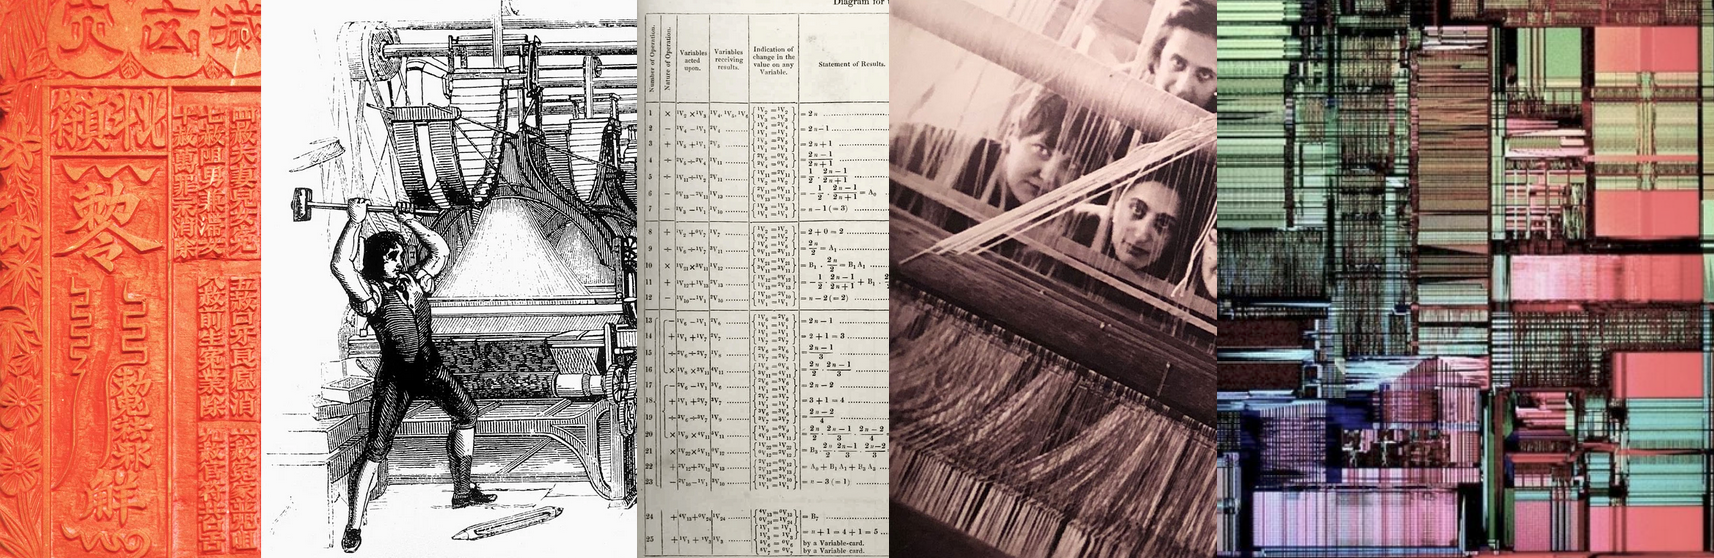

'<svg height=558 width=1714>\n    <image href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABrIAAAIuCAYAAADzBJg6AAAABHNCSVQICAgIfAhkiAAAABl0RVh0U29mdHdhcmUAZ25vbWUtc2NyZWVuc2hvdO8Dvz4AAAAtdEVYdENyZWF0aW9uIFRpbWUAU3VuIDAzIE5vdiAyMDI0IDA2OjAxOjI4IFBNIFBTVDwzQyUAACAASURBVHicnL1bjyVJkt/3M79EnHPyUrfu6p7umeHMksvlakWKFMGVQEDUgwRB0JMIQp9Cn0EAH/Qo6XNI4KsAvQggIQGUtOQOJS53l7tczvTM9K26qqsyK/NcIvxiejCPOHFOZXWPFI3srDwnwsPd3Nzc/f83M5d/8N/89xq7gKqACCqOkjLRQ1EhiaeWAS8eh+DFM9SC8x7vA1UVaiV4T0oZEaGUjDhHrRUBQozgImMaEQHnhKB2n3pHEUWqEhCqgKjinSflTCqZ2PeAUosigAIhBMiFkjMxBrJWuhjJKYMIThylFipQSqHrIjlntBZCCIgIaKVWYbpijIwp4Zyj5Ixzwmp9yd3dPR7FOahaEVcoKnRxTVahph2rviOlDECtsNqsKSVRa0FEEOfR7Kg14UQp7b0hBHLOOFWqU6oqQQUfhCElnPMEH6laWsvtOVVFnEOrEkJAa22fW3vVagIorj3pRZCq1KrEGFFVDikjruK9s3Ynh2rFOQcIKhnnHd4Hck5oLgTvUbB3OkclELyQcgIcQSq7sYJAkIQo+G7DYcwEqThfKK6iJaDqid2alHa4MqJ4MpFQM3GzIudCQIBCLhnnIhCgJpzLVIT15pKUKvvDPV3sSGnEew+1oGo6bW1RUMU53/TddCT4QK0VtNJ3nlIVVaXkghPwwXTbOYdzAhJIqSI+oyUTXUfKGR88Io5cBqIDcZEsHl8rtVZyzsQYKaLUWvEKohVcT9Y9znVojYjsCRKsD1VBBO8jzjkOh4P1TcmEEBjGER+C6XqpiBOcCM45cilWXwXnHQXr42EcUVW6IBQcqoqvAyIdPqwoxfRYRYhdxzAMxBCo1cafc45aC7UqVQURxTuh1oyoICJUBRVT11yO+jUpqZNWP3FQIXiHeKwMPIiQc6HvO7RitkSUWrPZHNehJYFTgnPUItRa8M7hvKfWDAi1gPcdpWT6VWAck9moWvBeEJSSs8nARQC899RacQ5Ure9sXFec96hArhUnAZpemF1zVDX7M13F2ZiTKmTvQB1STV6qighUV4hhRSkVweGlUBVwnqpidre9dxhHRIRcCn0XKSkhzTYpvpkIQYFai/V9+1vV2iGiOEwv5kuULBVPoNSKIAQnaFUQEHEogqI4KqVkHA7Eyhex96kw216tCurNPmnF+4BKIedEEI8TKFrxMVJVyQWcgFPTLQCtingbq60i1Fqtv7ynVrX3IE1Hi431NlZtXBR7tyo5Z7y3uUzVbKe0OcK1OWsacyIymVtEQCmIuKbYjlqtLICUM0KllNLGSECpKBWRiPdCzgMRT9VKCB4RKKXZ85oRoHootaIVvA8UrWa7XaSUNg7qQPDB6gm4oIg4UlGK2nhwajYsOE9BSCoEb/Na8IHgHCnnY/+7SAyeIe0QBx6PNL2RqmRV8CarWmxeEYHgPKL2G+8YUwIEUaFIwnmPqDM7oYlaRsQH62sfiD6QktmjGANVlFIUraZzTmuz10rVilKoZJzYHORQfBufCAiCSqAks8eI4Fr/SVX6ENmlwlCVfrVCfKCMByh7YtdTarE5bbR5zwmUWigaCc4TRNE0oL5j1Ip3Ag5EPI5IziNeML2UQAgZilK1g+iopSAoXoRcrU0iSvQOREhZCc7WL6gylmyyRdBSKA664FGtaC303cbGThrMpgC5FpwI3jlbW7S5fBobrjpcXFGlQtkhrkO8o5SDzYvYmmQadg5weHzwOBHrY+cpNRH8CudsjQiVkouNL+mszpqoFKLzBHUMaQRntuJ//K//FpMRUrNQ85plGnP2W9rca3NVrdXkq9qGahur7d6FUWMawNPnZnNlnotKKbN9p81tItLKrq3s4+fTz7Eetd17/HHOm0zad7L4T5ttmRqoqnP9pjrZ/KlNJkcZLNs21e9o0wXnbP0x/X1er6nt5z8nlyoo7zy3rIfJwiGuyQKd5aGqcxmTPIETGS+v03479lHVaWxI0yfXzN1RF4pWm6uktbfZ+qW8ztv4bnuxNeJCPs7ZWNSpPScy13d08fveMz1X5zX6cuI9F//7v3vg5ve36z3lnddzqb/Td8v2PVSfhfo++K7vasPD43QqTEx1HtA521eWeZ6OXWdz72Ic2pptOX7V1qlqz3jv5+/gqJvf1zdLmdmYm9oJp4uoY7smGTLvWFu7aMuHSWYPvGduv9p8NusXzDr5fTr0kJ2a2hh8xIcwj+GpHlOJ07g+l8dRprZ+N3sjs66cy/K8Xe/TUU7aXY9qLcdaPaQ3y75c1vGBF5zolSKc1RBpc8Vc+uLd1g/M229t6wzX6q5TGXqUpRmWYz1xVraT40w329pzHUJQodlVFh0jxzveI8v3ja9znTkfq+8dl03H3SShE704Vm76e5qPzuuzrMNRF46/z1ox/56qrPVY/+W41TZPKks9O9WNuZYPiOw79fKddizaMvfj8R1CU5sH2r6UwWlLbb++bM/pA8tVzLvPT3+pPGw3H6rH8vOH3vk+G/i+a9bohu1Ng2Van81DQRc9u9Rl3Fl7m+37jjWMyWxZT+U//h/+d7b7PUNRclVev75BNbBte7q1czjAO+Xi6oKrR4959tGH/OpXv+ZXn70EJ2xC5bITxEMBKI5uteLZs8f89qcfcbVe8/OvX/P5XeKLV68Z0wHpIqsu0ufMuut4+/aOw3DgatWx7hx9J6iP7PYHOgn89l/9axyGzLc3b0iuMg4DXsDVTKyZDy9X/ODJNRsHP/nwCR844dNnjwl9x83be7r1isurNZoLMo5EV7lcd1xebAjecXvzmjevvuVf/os/4Wd/+IfstltC8Pz0t35Kt+6pqvTe8/zDZ3z00UesVmtubm7mPokxEkIgpQTAOI5orYhzxBAaHgs5Z0op8x5YRNjv93jnCCHgnKPrOsDWc+j0TEKrMgwDKaV5zxxiR3dxyXq94XAY+bM//3P+6F/+MYfDwH63Z8yZD54/55OPPqLkwjcvvibnBAr/3t/4PX74yQ+4fvaUv/0f/D597NiPAwOe3Qi1OgR4O2T+7Zu3fLUf8H3PJjquY+Ci78F7tilx2N2z8Z79fuDNIfHl7T1vq2EDQ8qs1mtQw56FQOkc+/Ge513PR6vAJ4/WfLrp+K1nT6lppIuRb759RfQdTiIHgcE7xlz45ZsdX71+zUUvfHh9wUdXl6zFs14F9rs7rtdXfPn2nm0t1GHPDz58xudfveKb+8xfvH7N6uqCDZ7D/T3rCFerQI4dLw7KX3z9hs8+/5o3dwOZiEjAVcUD4gu+d6w2azZX16Scudlu6dYrEGU9Hnh0ccnTJ4/puoirhZzV+AARht2WXAoaHW/f3lHGwmE/sssVcKja/tOp4lFi51ld9lyvN2z6NTU4w3BV2SXHy/ste80kDz2VJ9HzuO+56tcwDow7w+DXmxWbzuPHAyF4Dt6xq0JR4X6XudsNuK6nX2+QWsiHLZ0qQSplPOCrku637O7vcV3EBY8LgdBfcHGx4qJXnvSBi1XEaSVU5dlmTZQMqkQX2XQ96y6w322pvnK1ueJmvzcsuQZKv+F29wbxnlfjil/ulGHc8enjR+x3dxxyoes2fPniNbeHPa7r2Kw23N/f4cQTNxc4F9hu79ne36J55C/96BM+evKEUCshBLp1z6t94uaQ0Zo57Pd4cQ37tfkg9D1d7HGi3L3d8nZ7x9vdgaKQi2ENQmCfKzSMHUmIK6xcJPrI5fUFjy7WPN50bDzEsdCFQPAJyYneCSsvbPqOQKJ
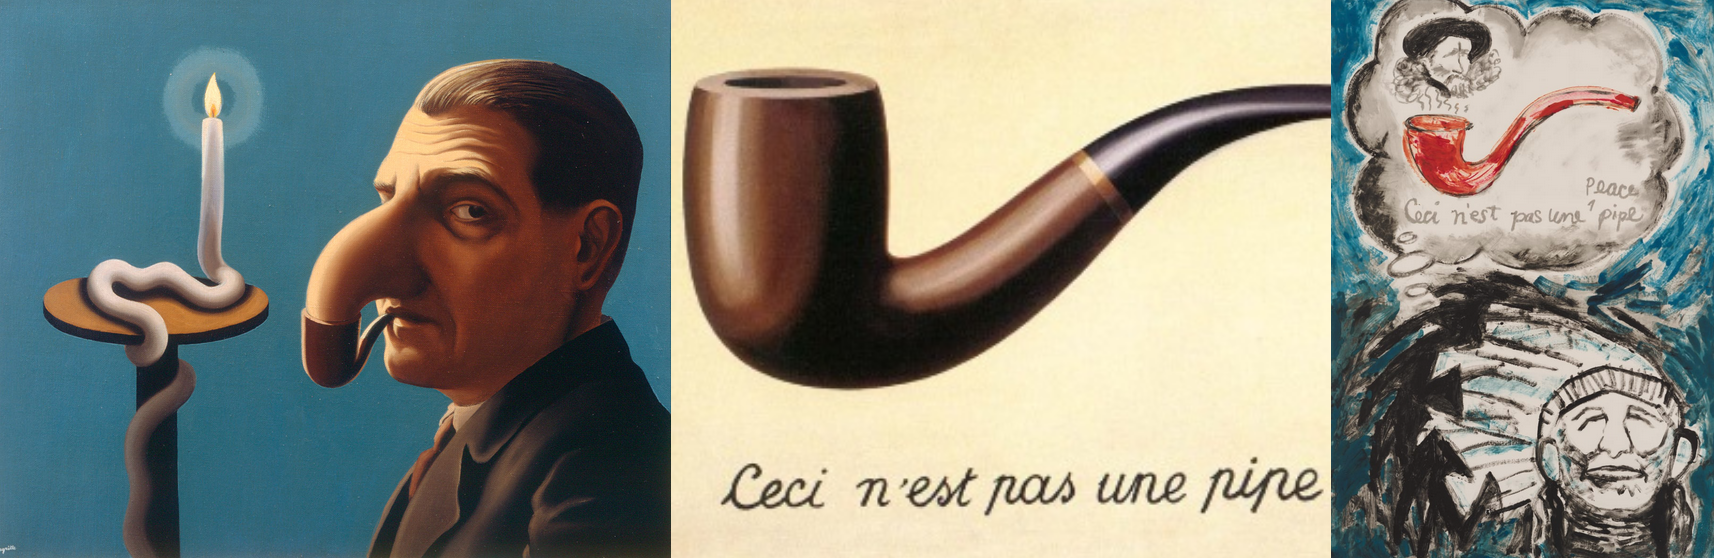

creating the orginal svg with the attachment blob 
 def datauri_image(datauri):
 import io, urllib.request, PIL.Image 
 with urllib.request.urlopen(datauri) as response: 
 return PIL.Image.open(io.BytesIO(response.read()))


for i, row in attachments.iterrows():
 for typ, blob in row.items():
 image = datauri_image(data := F"data:{typ};base64,{blob}")
 svg_image =(
 
 < svg height = {h} width = {w} > 
 < image href = "{href}" height = {h} width = {w} id = "{name}" /> 
 </ svg > 
 
 
 ).format(href=data, h=image.size[1], w=image.size[0], name=row.name[1])

 display(svg_image)

In [116]:
%%
## creating the orginal `svg` with the attachment blob

    def datauri_image(datauri):
        import io, urllib.request, PIL.Image    
        with urllib.request.urlopen(datauri) as response: 
            return PIL.Image.open(io.BytesIO(response.read()))

    
    for i, row in attachments.iterrows():
        for typ, blob in row.items():
            image = datauri_image(data := F"data:{typ};base64,{blob}")
            svg_image =(
```html
<svg height={h} width={w}>
    <image href="{href}" height={h} width={w} id="{name}"/>
</svg>
```
            ).format(href=data, h=image.size[1], w=image.size[0], name=row.name[1])

            display(svg_image)

In [117]:
%%
## reusing the svg elements in html

now we re`use` the images with no overhead to the document.
this immediately demonstrates an ability to use attachments outside the cell where they are defined.

    for doc, name in attachments.index: display(
```html
<svg height=600 width=1500>
  <use href="#{}"/>
</svg>
```
    
    .format(name))

'<svg height=600 width=1500>\n  <use href="#404ac14c-68b5-4d8c-a6e6-7a6c73277d07.png"/>\n</svg>\n'

'<svg height=600 width=1500>\n  <use href="#e9e27d2d-3796-483b-85db-6e02ab9a2c04.png"/>\n</svg>\n'

reusing the svg elements in html 
 now we re use the images with no overhead to the document.
this immediately demonstrates an ability to use attachments outside the cell where they are defined. 
 for doc, name in attachments.index: display(
 
 < svg height = 600 width = 1500 > 
 < use href = "#{}" /> 
 </ svg > 
 
 
 .format(name))

In [119]:
%%
## reusin the svg element in css

TODO

reusin the svg element in css 
 TODO